In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv("train.csv")
df.date = pd.to_datetime(df.date)
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [3]:
df.dtypes

date      datetime64[ns]
hour               int64
demand             int64
dtype: object

In [4]:
df['day'] = df.date.dt.day
df['day_name'] = df.date.dt.day_name()
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['quarter'] = df.date.dt.quarter


df.head()

,date,hour,demand,day,day_name,month,year,quarter
0,2018-08-18,9,91,18,Saturday,8,2018,3
1,2018-08-18,10,21,18,Saturday,8,2018,3
2,2018-08-18,13,23,18,Saturday,8,2018,3
3,2018-08-18,14,104,18,Saturday,8,2018,3
4,2018-08-18,15,81,18,Saturday,8,2018,3


### Basic EDA

In [5]:
pd.set_option('display.max_rows', 500)
ptable = pd.pivot_table(df, index=['day_name'], columns=['year', 'quarter'], values="demand", aggfunc='sum')
ptable

year       2018          2019                        2020                \
quarter       3      4      1      2      3      4      1      2      3   
day_name                                                                  
Friday     5192  22356  20925  21588  14663  22197  21602  21371  20099   
Monday     5044  19222  15982  18217  16172  18547  19406  19915  18161   
Saturday   6727  24863  23626  24819  16682  26590  24547  25867  20246   
Sunday     5857  21793  21906  21596  17443  23808  22821  24230  18525   
Thursday   5243  18214  19046  17697  13371  19973  18274  19789  18070   
Tuesday    5029  17553  17457  16878  14953  19443  17535  19277  18380   
Wednesday  4754  17269  17354  17439  14278  18727  18177  19292  20203   

year               2021  
quarter        4      1  
day_name                 
Friday     15378  16818  
Monday     15547  12709  
Saturday   19096  17591  
Sunday     17766  18272  
Thursday   16224  11912  
Tuesday    14309  11762  
Wednesday  14213  12245

<AxesSubplot:xlabel='day_name'>

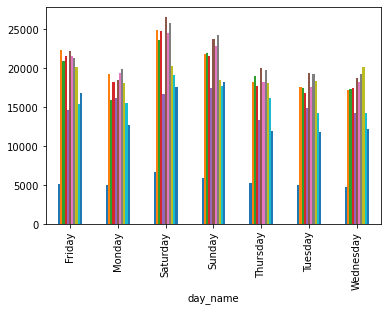

In [6]:
ptable.plot(kind = 'bar', legend=False)

1. From above pivot table and bar graph. it is clearly seen that Weekends are most busy as compare to weekdays
2. 2019 was successfuly year with maximum number hour booking.
3. second quarter is most busy compare to other quarters.



## Predicting for new data

In [7]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [8]:
X_train = df[['day', 'month', 'year', 'quarter', 'hour']]
X_train['day_of_week'] = df.date.dt.day_of_week
X_train['weekofyear'] = df.date.dt.weekofyear
X_train['day_of_year'] = df.date.dt.day_of_year
y_train = df[['demand']]

display(X_train.head())
display(y_train.head())

<ipython-input-8-f239e3508444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_week'] = df.date.dt.day_of_week
<ipython-input-8-f239e3508444>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X_train['weekofyear'] = df.date.dt.weekofyear
<ipython-input-8-f239e3508444>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weekofyear'] = df.date.dt.weekofyear


,day,month,year,quarter,hour,day_of_week,weekofyear,day_of_year
0,18,8,2018,3,9,5,33,230
1,18,8,2018,3,10,5,33,230
2,18,8,2018,3,13,5,33,230
3,18,8,2018,3,14,5,33,230
4,18,8,2018,3,15,5,33,230


,demand
0,91
1,21
2,23
3,104
4,81


In [9]:
test_df = pd.read_csv("test.csv")
test_df.date = pd.to_datetime(test_df.date)

fs_X_test = test_df.copy()

In [10]:
fs_X_test['day'] = test_df.date.dt.day
fs_X_test['month'] = test_df.date.dt.month
fs_X_test['year'] = test_df.date.dt.year
fs_X_test['quarter'] = test_df.date.dt.quarter
fs_X_test['day_of_week'] = test_df.date.dt.day_of_week
fs_X_test['weekofyear'] = test_df.date.dt.weekofyear
fs_X_test['day_of_year'] = test_df.date.dt.day_of_year
fs_X_test = fs_X_test[['day', 'month', 'year', 'quarter', 'hour', 'weekofyear', 'day_of_year']]
fs_X_test['day_of_week'] = test_df.date.dt.day_of_week
fs_X_test.head()

<ipython-input-10-5dab5c2d6cb2>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  fs_X_test['weekofyear'] = test_df.date.dt.weekofyear


,day,month,year,quarter,hour,weekofyear,day_of_year,day_of_week
0,1,3,2021,1,0,9,60,0
1,1,3,2021,1,1,9,60,0
2,1,3,2021,1,2,9,60,0
3,1,3,2021,1,3,9,60,0
4,1,3,2021,1,5,9,60,0


## GridSearch Parameter hypertunning

In [11]:
def getHyperparmeter(model, hypercombination, scoring):
    ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    return GridSearchCV(model, hypercombination, scoring=scoring, cv=ss)

## Applying XGBoost Algo

In [12]:
XGBoost_hyper = {
 'booster': ['gbtree', 'gblinear', 'dart'],
 'learning_rate': [0.01, 0.03, 0.1, 0.3],
 'max_depth': [6, 10, None],
 'colsample_bytree':[0.03, 0.5, 1],
 'objective': ['reg:pseudohubererror', 'reg:squaredlogerror', 'rank:ndcg', 'rank:map', 'rank:pairwise'],
 'eval_metric': ['rmse', None],
 'n_estimators': [1000]
 }


In [ ]:
xgBoost_model = XGBRegressor()
xgBoost_CV = getHyperparmeter(xgBoost_model, XGBoost_hyper, 'neg_root_mean_squared_error')
xgBoost_CV.fit(X_train, y_train)
xgBoost_CV.best_estimator_

XGBRegressor(booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, 
             eval_metric='rsme', learning_rate=0.03,
             max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=10000, n_jobs=12,
             objective='reg:squaredlogerror',
             predictor='auto', scale_pos_weight=1, tree_method='exact')

### Default XGBoost

In [13]:
xgb_reg = XGBRegressor()

### Suggested by Grid Search CV (Not used - bad result in test dataset)

In [ ]:
### But this is giving bad result in test dataset.

xgb_reg = XGBRegressor(booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, 
             eval_metric='rsme', learning_rate=0.03,
             max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=10000, n_jobs=12,
             objective='reg:squaredlogerror',
             predictor='auto', scale_pos_weight=1, tree_method='exact')

In [14]:
eval_set = [(X_train, y_train)]

In [15]:
## Fiting the model and passing evaluation metrics as rmse for better result

xgb_reg.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:64.27379
[1]	validation_0-rmse:51.19917
[2]	validation_0-rmse:43.27155
[3]	validation_0-rmse:38.64334
[4]	validation_0-rmse:35.91192
[5]	validation_0-rmse:34.36108
[6]	validation_0-rmse:33.40263
[7]	validation_0-rmse:32.84220
[8]	validation_0-rmse:32.06166
[9]	validation_0-rmse:31.79154
[10]	validation_0-rmse:31.45327
[11]	validation_0-rmse:31.34577
[12]	validation_0-rmse:31.16162
[13]	validation_0-rmse:31.03285
[14]	validation_0-rmse:30.89466
[15]	validation_0-rmse:30.78098
[16]	validation_0-rmse:30.70373
[17]	validation_0-rmse:30.56008
[18]	validation_0-rmse:30.47542
[19]	validation_0-rmse:30.39045
[20]	validation_0-rmse:30.33504
[21]	validation_0-rmse:30.23380
[22]	validation_0-rmse:30.16507
[23]	validation_0-rmse:30.06252
[24]	validation_0-rmse:30.01142
[25]	validation_0-rmse:29.94040
[26]	validation_0-rmse:29.87513
[27]	validation_0-rmse:29.81361
[28]	validation_0-rmse:29.76128
[29]	validation_0-rmse:29.71678
[30]	validation_0-rmse:29.63851
[31]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### predicting test data

In [16]:
y_pred_final = xgb_reg.predict(fs_X_test)
y_pred_final

array([60.669815, 68.46121 , 67.749626, ..., 38.803295, 55.253296,
        8.579385], dtype=float32)

### Saving the submission file

In [17]:
test_df['demand'] = y_pred_final
test_df

,date,hour,demand
0,2021-03-01,0,60.669815
1,2021-03-01,1,68.461212
2,2021-03-01,2,67.749626
3,2021-03-01,3,58.808876
4,2021-03-01,5,45.173038
...,...,...,...
7645,2022-03-28,19,116.151344
7646,2022-03-28,20,69.863533
7647,2022-03-28,21,38.803295
7648,2022-03-28,22,55.253296


In [18]:
test_df.to_csv("xgboost_default.csv", index=False)

### LGBM Regression Model - Default parameter


In [19]:
lgb_reg = LGBMRegressor()
lgb_reg

LGBMRegressor()

In [20]:
### Fiting the model with evaluation metric as rsme

lgb_reg.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

[1]	training's rmse: 40.3412	training's l2: 1627.41
[2]	training's rmse: 39.2209	training's l2: 1538.28
[3]	training's rmse: 38.2535	training's l2: 1463.33
[4]	training's rmse: 37.4485	training's l2: 1402.39
[5]	training's rmse: 36.7186	training's l2: 1348.26
[6]	training's rmse: 36.1165	training's l2: 1304.4
[7]	training's rmse: 35.593	training's l2: 1266.86
[8]	training's rmse: 35.132	training's l2: 1234.26
[9]	training's rmse: 34.7323	training's l2: 1206.33
[10]	training's rmse: 34.4044	training's l2: 1183.66
[11]	training's rmse: 34.0983	training's l2: 1162.69
[12]	training's rmse: 33.851	training's l2: 1145.89
[13]	training's rmse: 33.6255	training's l2: 1130.67
[14]	training's rmse: 33.3868	training's l2: 1114.68
[15]	training's rmse: 33.2012	training's l2: 1102.32
[16]	training's rmse: 33.0302	training's l2: 1090.99
[17]	training's rmse: 32.8835	training's l2: 1081.32
[18]	training's rmse: 32.7382	training's l2: 1071.79
[19]	training's rmse: 32.6162	training's l2: 1063.82
[20]	t

LGBMRegressor()

### Predicting with trained model

In [21]:
y_pred_final = lgb_reg.predict(fs_X_test)
y_pred_final

array([59.39619913, 59.86883472, 59.86883472, ..., 67.61039566,
       63.3843709 , 46.41563018])

In [22]:
test_df['demand'] = y_pred_final
test_df

,date,hour,demand
0,2021-03-01,0,59.396199
1,2021-03-01,1,59.868835
2,2021-03-01,2,59.868835
3,2021-03-01,3,61.782817
4,2021-03-01,5,58.516716
...,...,...,...
7645,2022-03-28,19,89.052309
7646,2022-03-28,20,77.200993
7647,2022-03-28,21,67.610396
7648,2022-03-28,22,63.384371


In [23]:
test_df.to_csv("lgbm_default.csv", index=False)

# After Running both the model it is noticed that XGBoost is giving the proper result for this senario i.e. 34